##Integrantes

550562 - Larissa Akemi Iwamoto

98163 - Júlia Martins Santana Figueiredo

94679 - Vinicius Becker Prediger

552292 - Julia Nery Sinigalia

552389 - Isabelli Heloiza Ferreira Lima

##Base de dados

Nossa base de dados consiste no estudo de Indicadores de ansiedade ou depressão com base na frequência relatada de sintomas durante os últimos 7 dias. O Centro Nacional de Estatísticas de Saúde (NCHS) fez perguntas para obter informações sobre a frequência dos sintomas de ansiedade e depressão, fornecendo uma visão da prevalência desses transtornos.

O objetivo dessa IA é auxiliar psicólogos e psiquiatras do nosso projeto na identificação do diagnóstico do paciente, proporcionando um recurso valioso para a sociedade. Esta iniciativa visa contribuir significativamente para aprimorar a compreensão e o tratamento dos transtornos mentais, fortalecendo os esforços no campo da saúde mental.

O conjunto de dados utilizado foi obtido a partir da plataforma Kaggle. Para acessar os detalhes e explorar mais a fundo as informações disponíveis, segue o link de acesso: https://www.kaggle.com/datasets/subidit/indicators-of-anxiety-or-depression. Essa fonte garante a qualidade e confiabilidade dos dados que estamos utilizando.

##Carregando os dados e fazendo análise exploratória

In [1]:
# Trabalhando com dados em tabelas
import pandas as pd

# Trabalhando com gráficos
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dados = pd.read_excel('/content/Transtornos mentais.xlsx') # Carregando o arquivo XLSX

In [3]:
dados.head()

,Diagnósticos,Grupo,Estado,Subgrupo,Fase,Período de tempo,Etiqueta do período de tempo,Data de início do período,Data de término do período,Valor,CI baixo,CI alto,Intervalo de confiança,Faixa de quartil
0,Symptoms of Depressive Disorder,National Estimate,United States,United States,1.0,1,"Apr 23 - May 5, 2020",04/23/2020,2020-05-05 00:00:00,23.5,22.7,24.3,22.7 - 24.3,NaN
1,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,1.0,1,"Apr 23 - May 5, 2020",04/23/2020,2020-05-05 00:00:00,32.7,30.2,35.2,30.2 - 35.2,NaN
2,Symptoms of Depressive Disorder,By Age,United States,30 - 39 years,1.0,1,"Apr 23 - May 5, 2020",04/23/2020,2020-05-05 00:00:00,25.7,24.1,27.3,24.1 - 27.3,NaN
3,Symptoms of Depressive Disorder,By Age,United States,40 - 49 years,1.0,1,"Apr 23 - May 5, 2020",04/23/2020,2020-05-05 00:00:00,24.8,23.3,26.2,23.3 - 26.2,NaN
4,Symptoms of Depressive Disorder,By Age,United States,50 - 59 years,1.0,1,"Apr 23 - May 5, 2020",04/23/2020,2020-05-05 00:00:00,23.2,21.5,25.0,21.5 - 25.0,NaN


In [4]:
dados.columns # listando as colunas existentes

Index(['Diagnósticos', 'Grupo', 'Estado', 'Subgrupo', 'Fase',
       'Período de tempo', 'Etiqueta do período de tempo',
       'Data de início do período', 'Data de término do período', 'Valor',
       'CI baixo', 'CI alto', 'Intervalo de confiança', 'Faixa de quartil'],
      dtype='object')

In [5]:
dados.info() #informações sobre os tipos de dados e valores ausentes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11484 entries, 0 to 11483
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Diagnósticos                  11484 non-null  object 
 1   Grupo                         11484 non-null  object 
 2   Estado                        11484 non-null  object 
 3   Subgrupo                      11484 non-null  object 
 4   Fase                          11484 non-null  float64
 5   Período de tempo              11484 non-null  int64  
 6   Etiqueta do período de tempo  11484 non-null  object 
 7   Data de início do período     11484 non-null  object 
 8   Data de término do período    11484 non-null  object 
 9   Valor                         10944 non-null  float64
 10  CI baixo                      10944 non-null  float64
 11  CI alto                       10944 non-null  float64
 12  Intervalo de confiança        10944 non-null  object 
 13  F

In [6]:
dados.isnull().sum() # Ver se tem dados nulos (células vazias)

Diagnósticos                       0
Grupo                              0
Estado                             0
Subgrupo                           0
Fase                               0
Período de tempo                   0
Etiqueta do período de tempo       0
Data de início do período          0
Data de término do período         0
Valor                            540
CI baixo                         540
CI alto                          540
Intervalo de confiança           540
Faixa de quartil                3834
dtype: int64

In [7]:
dados.shape #verificando as dimensões dos dados

(11484, 14)

In [8]:
dados.describe() #calculando estatísticas descritivas

,Fase,Período de tempo,Valor,CI baixo,CI alto
count,11484.000000,11484.000000,10944.000000,10944.000000,10944.000000
mean,2.421769,24.949843,29.881241,26.207575,33.806990
std,1.188310,15.131457,8.007529,7.850670,8.385198
min,-1.000000,1.000000,6.400000,4.500000,7.900000
25%,1.000000,12.000000,24.400000,20.900000,28.100000
50%,3.000000,25.000000,29.300000,25.600000,33.300000
75%,3.200000,38.000000,34.600000,30.800000,38.800000
max,3.600000,50.000000,78.600000,69.800000,85.800000


In [9]:
dados.dtypes #informações sobre as colunas e os seus tipos de dados

Diagnósticos                     object
Grupo                            object
Estado                           object
Subgrupo                         object
Fase                            float64
Período de tempo                  int64
Etiqueta do período de tempo     object
Data de início do período        object
Data de término do período       object
Valor                           float64
CI baixo                        float64
CI alto                         float64
Intervalo de confiança           object
Faixa de quartil                 object
dtype: object

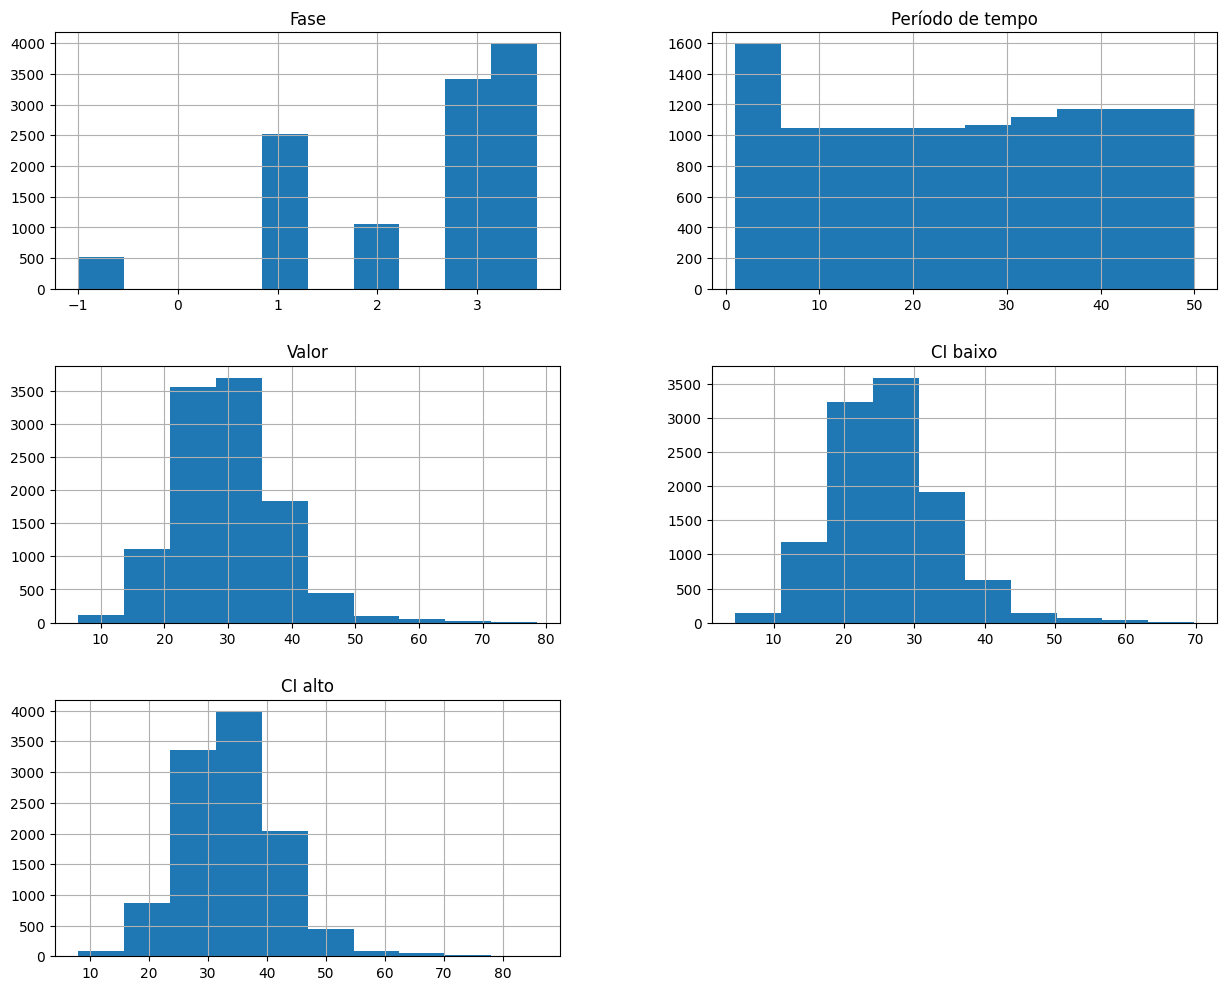

In [10]:
dados.hist(figsize=(15,12)); #distribuição das variáveis qualitativas

<ipython-input-11-63696d2671e1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacao = dados.corr()


<Axes: >

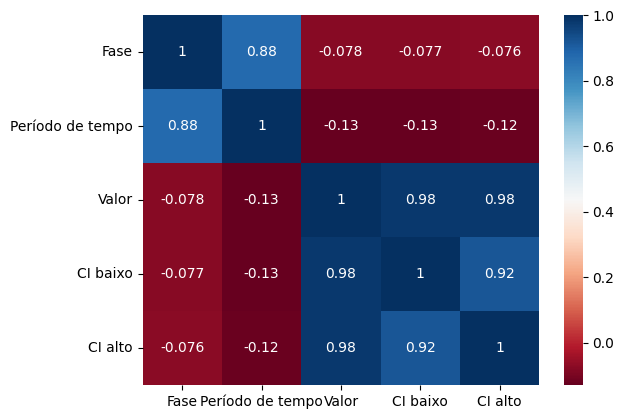

In [11]:
#Analisando correlações entre váriáveis
correlacao = dados.corr()
correlacao

#Plotando o gráfico de correlação
sns.heatmap(correlacao, cmap='RdBu', annot=True)

##Gráficos

Gráfico de dispersão para explorar relações entre pares de variáveis numéricas:

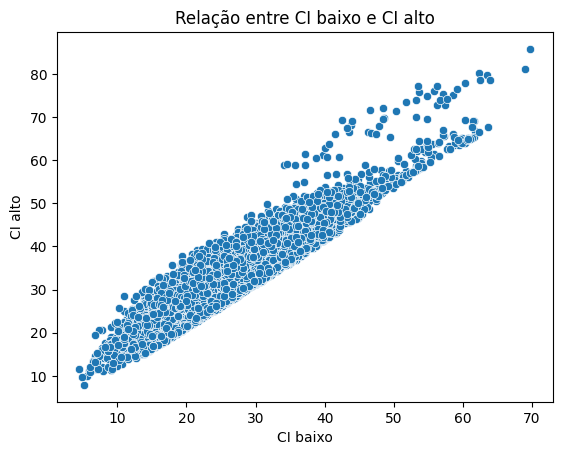

In [12]:
#Nomeando gráfico
plt.title('Relação entre CI baixo e CI alto')
plt.xlabel("CI baixo")
plt.ylabel("CI alto")

#Gerando gráfico
sns.scatterplot(x='CI baixo', y='CI alto', data=dados)

#Mostrando gráfico
plt.show()

A seguir um histograma para saber a frequência da classe de valores:

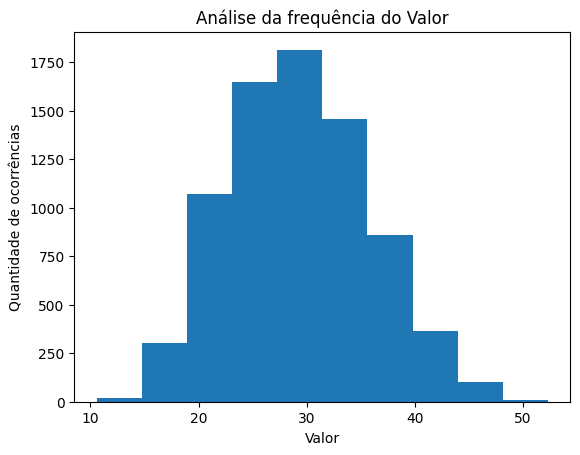

In [13]:
# Gerando gráfico
plt.hist("Valor", data=dados.dropna())

# Nomeando o gráfico
plt.title("Análise da frequência do Valor")
plt.ylabel("Quantidade de ocorrências")
plt.xlabel("Valor")

# Mostrar gráfico
plt.show()

O gráfico a seguir é um histograma que representa a distribuição de dados para duas variáveis diferentes:

Primeiro, dataframes com informações de cada transtorno.

In [14]:
dados_ans = dados[dados['Diagnósticos']=='Symptoms of Anxiety Disorder'] #Criando dataframe com informações de transtorno de ansiedade

In [15]:
dados_ans.head()

,Diagnósticos,Grupo,Estado,Subgrupo,Fase,Período de tempo,Etiqueta do período de tempo,Data de início do período,Data de término do período,Valor,CI baixo,CI alto,Intervalo de confiança,Faixa de quartil
70,Symptoms of Anxiety Disorder,National Estimate,United States,United States,1.0,1,"Apr 23 - May 5, 2020",04/23/2020,2020-05-05 00:00:00,30.8,30.0,31.7,30.0 - 31.7,NaN
71,Symptoms of Anxiety Disorder,By Age,United States,18 - 29 years,1.0,1,"Apr 23 - May 5, 2020",04/23/2020,2020-05-05 00:00:00,40.2,38.1,42.4,38.1 - 42.4,NaN
72,Symptoms of Anxiety Disorder,By Age,United States,30 - 39 years,1.0,1,"Apr 23 - May 5, 2020",04/23/2020,2020-05-05 00:00:00,34.4,32.6,36.1,32.6 - 36.1,NaN
73,Symptoms of Anxiety Disorder,By Age,United States,40 - 49 years,1.0,1,"Apr 23 - May 5, 2020",04/23/2020,2020-05-05 00:00:00,34.1,32.1,36.2,32.1 - 36.2,NaN
74,Symptoms of Anxiety Disorder,By Age,United States,50 - 59 years,1.0,1,"Apr 23 - May 5, 2020",04/23/2020,2020-05-05 00:00:00,31.0,29.0,33.1,29.0 - 33.1,NaN


In [16]:
dados_depre = dados[dados['Diagnósticos']=='Symptoms of Depressive Disorder'] #Criando dataframe com informações de transtorno depressivo

In [17]:
dados_depre.head()

,Diagnósticos,Grupo,Estado,Subgrupo,Fase,Período de tempo,Etiqueta do período de tempo,Data de início do período,Data de término do período,Valor,CI baixo,CI alto,Intervalo de confiança,Faixa de quartil
0,Symptoms of Depressive Disorder,National Estimate,United States,United States,1.0,1,"Apr 23 - May 5, 2020",04/23/2020,2020-05-05 00:00:00,23.5,22.7,24.3,22.7 - 24.3,NaN
1,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,1.0,1,"Apr 23 - May 5, 2020",04/23/2020,2020-05-05 00:00:00,32.7,30.2,35.2,30.2 - 35.2,NaN
2,Symptoms of Depressive Disorder,By Age,United States,30 - 39 years,1.0,1,"Apr 23 - May 5, 2020",04/23/2020,2020-05-05 00:00:00,25.7,24.1,27.3,24.1 - 27.3,NaN
3,Symptoms of Depressive Disorder,By Age,United States,40 - 49 years,1.0,1,"Apr 23 - May 5, 2020",04/23/2020,2020-05-05 00:00:00,24.8,23.3,26.2,23.3 - 26.2,NaN
4,Symptoms of Depressive Disorder,By Age,United States,50 - 59 years,1.0,1,"Apr 23 - May 5, 2020",04/23/2020,2020-05-05 00:00:00,23.2,21.5,25.0,21.5 - 25.0,NaN


<ipython-input-18-cda634133557>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_ans['Data de início do período'] = pd.to_datetime(dados_ans['Data de início do período'], errors='coerce')
<ipython-input-18-cda634133557>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_depre['Data de término do período'] = pd.to_datetime(dados_depre['Data de término do período'], errors='coerce')


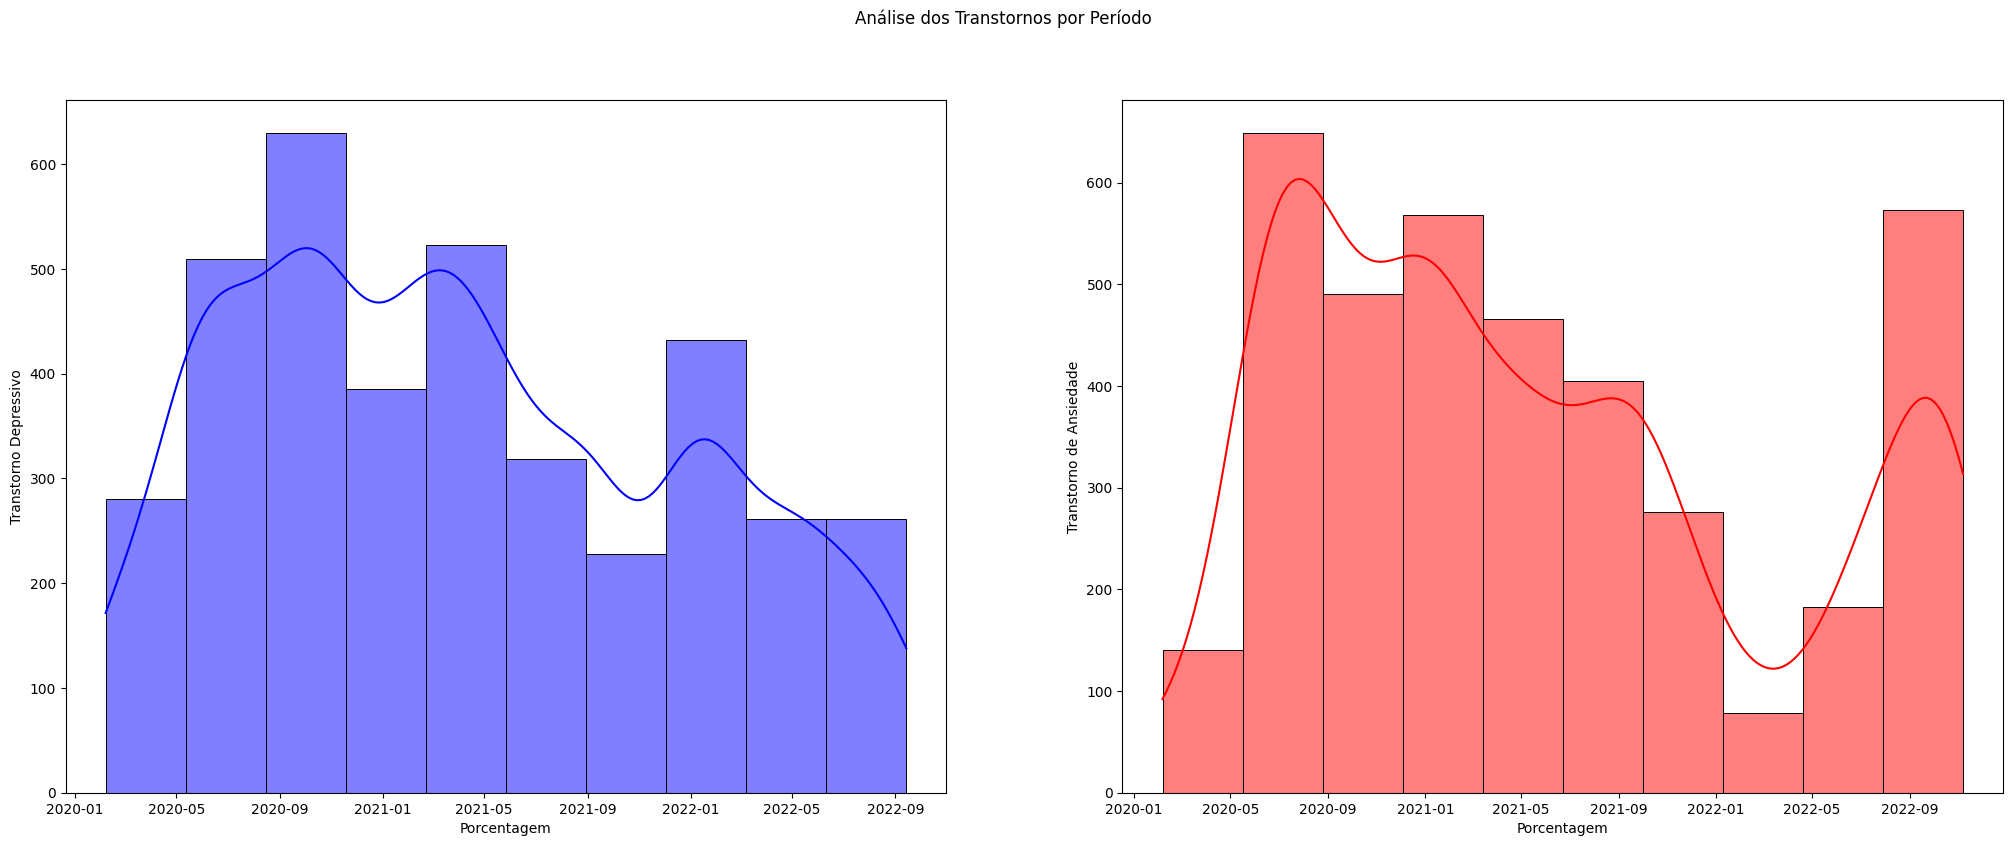

In [18]:
# Criando uma figura e um conjunto de eixos
fig, axes = plt.subplots(1, 2, figsize=(25, 9))

# Nomeando
fig.suptitle('Análise dos Transtornos por Período')

# Convertendo as colunas para o tipo datetime
dados_ans['Data de início do período'] = pd.to_datetime(dados_ans['Data de início do período'], errors='coerce')
dados_depre['Data de término do período'] = pd.to_datetime(dados_depre['Data de término do período'], errors='coerce')

# Gerando histograma
sns.histplot(ax=axes[0],
             data=dados_ans['Data de início do período'],
             kde=True,
             bins=10,
             linewidth=0.7,
             color='blue'
             )
# Gerando histograma
sns.histplot(ax=axes[1],
             data=dados_depre['Data de término do período'],
             kde=True,
             bins=10,
             linewidth=0.7,
             color='red'
             )
# Nomeando
axes[0].set(xlabel='Porcentagem', ylabel='Transtorno Depressivo')
axes[1].set(xlabel='Porcentagem', ylabel='Transtorno de Ansiedade')

# Exibindo a figura
plt.show()

Gráfico para análisar a fase dos transtornos por período de tempo.

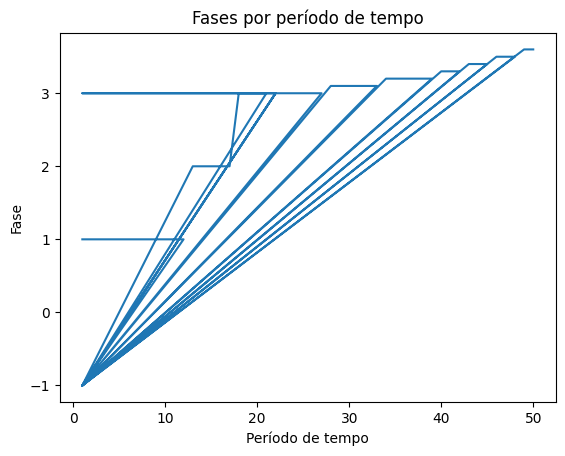

In [19]:
# Criando uma figura e um conjunto de eixos
fig, ax = plt.subplots()

# Convertendo as colunas para float
dados['Fase'] = dados['Fase'].astype(float)

# Plotando os pontos no gráfico
ax.plot(dados['Período de tempo'], dados['Fase'])

# Definindo o título, rótulos do eixo x e y
ax.set_title('Fases por período de tempo')
ax.set_xlabel('Período de tempo')
ax.set_ylabel('Fase')

# Exibindo o gráfico
plt.show()

A seguir um gráfico de comparação entre 3 estados para análisar a Depressão, por CI baixo:

Primeiro, criando dataframes com informações de cada estado.

In [20]:
dados_ala = dados[dados['Estado']=='Alabama'] #Criando dataframe com informações do Alabama

In [21]:
dados_ala.head()

,Diagnósticos,Grupo,Estado,Subgrupo,Fase,Período de tempo,Etiqueta do período de tempo,Data de início do período,Data de término do período,Valor,CI baixo,CI alto,Intervalo de confiança,Faixa de quartil
19,Symptoms of Depressive Disorder,By State,Alabama,Alabama,1.0,1,"Apr 23 - May 5, 2020",04/23/2020,2020-05-05 00:00:00,18.6,14.6,23.1,14.6 - 23.1,16.5 - 20.7
89,Symptoms of Anxiety Disorder,By State,Alabama,Alabama,1.0,1,"Apr 23 - May 5, 2020",04/23/2020,2020-05-05 00:00:00,25.6,20.7,30.9,20.7 - 30.9,21.7 - 27.8
159,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Alabama,Alabama,1.0,1,"Apr 23 - May 5, 2020",04/23/2020,2020-05-05 00:00:00,30.3,24.8,36.2,24.8 - 36.2,25.6 - 33.3
229,Symptoms of Depressive Disorder,By State,Alabama,Alabama,1.0,2,"May 7 - May 12, 2020",2020-07-05 00:00:00,2020-12-05 00:00:00,22.5,16.4,29.5,16.4 - 29.5,20.7 - 23.0
299,Symptoms of Anxiety Disorder,By State,Alabama,Alabama,1.0,2,"May 7 - May 12, 2020",2020-07-05 00:00:00,2020-12-05 00:00:00,27.2,21.1,34.1,21.1 - 34.1,26.3 - 28.7


In [22]:
dados_cali = dados[dados['Estado']=='California'] #Criando dataframe com informações da California

In [23]:
dados_cali.head()

,Diagnósticos,Grupo,Estado,Subgrupo,Fase,Período de tempo,Etiqueta do período de tempo,Data de início do período,Data de término do período,Valor,CI baixo,CI alto,Intervalo de confiança,Faixa de quartil
23,Symptoms of Depressive Disorder,By State,California,California,1.0,1,"Apr 23 - May 5, 2020",04/23/2020,2020-05-05 00:00:00,25.4,22.5,28.6,22.5 - 28.6,24.1 - 28.7
93,Symptoms of Anxiety Disorder,By State,California,California,1.0,1,"Apr 23 - May 5, 2020",04/23/2020,2020-05-05 00:00:00,30.8,28.2,33.5,28.2 - 33.5,30.4 - 31.6
163,Symptoms of Anxiety Disorder or Depressive Dis...,By State,California,California,1.0,1,"Apr 23 - May 5, 2020",04/23/2020,2020-05-05 00:00:00,37.4,34.2,40.6,34.2 - 40.6,36.8 - 41.4
233,Symptoms of Depressive Disorder,By State,California,California,1.0,2,"May 7 - May 12, 2020",2020-07-05 00:00:00,2020-12-05 00:00:00,22.8,19.2,26.8,19.2 - 26.8,20.7 - 23.0
303,Symptoms of Anxiety Disorder,By State,California,California,1.0,2,"May 7 - May 12, 2020",2020-07-05 00:00:00,2020-12-05 00:00:00,31.4,27.4,35.6,27.4 - 35.6,28.8 - 31.5


In [24]:
dados_alk = dados[dados['Estado']=='Alaska'] #Criando dataframe com informações do Alaska

In [25]:
dados_alk.head()

,Diagnósticos,Grupo,Estado,Subgrupo,Fase,Período de tempo,Etiqueta do período de tempo,Data de início do período,Data de término do período,Valor,CI baixo,CI alto,Intervalo de confiança,Faixa de quartil
20,Symptoms of Depressive Disorder,By State,Alaska,Alaska,1.0,1,"Apr 23 - May 5, 2020",04/23/2020,2020-05-05 00:00:00,19.2,16.8,21.8,16.8 - 21.8,16.5 - 20.7
90,Symptoms of Anxiety Disorder,By State,Alaska,Alaska,1.0,1,"Apr 23 - May 5, 2020",04/23/2020,2020-05-05 00:00:00,27.7,24.8,30.7,24.8 - 30.7,21.7 - 27.8
160,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Alaska,Alaska,1.0,1,"Apr 23 - May 5, 2020",04/23/2020,2020-05-05 00:00:00,31.5,28.8,34.4,28.8 - 34.4,25.6 - 33.3
230,Symptoms of Depressive Disorder,By State,Alaska,Alaska,1.0,2,"May 7 - May 12, 2020",2020-07-05 00:00:00,2020-12-05 00:00:00,25.1,20.3,30.4,20.3 - 30.4,23.1 - 25.6
300,Symptoms of Anxiety Disorder,By State,Alaska,Alaska,1.0,2,"May 7 - May 12, 2020",2020-07-05 00:00:00,2020-12-05 00:00:00,27.4,22.8,32.4,22.8 - 32.4,26.3 - 28.7


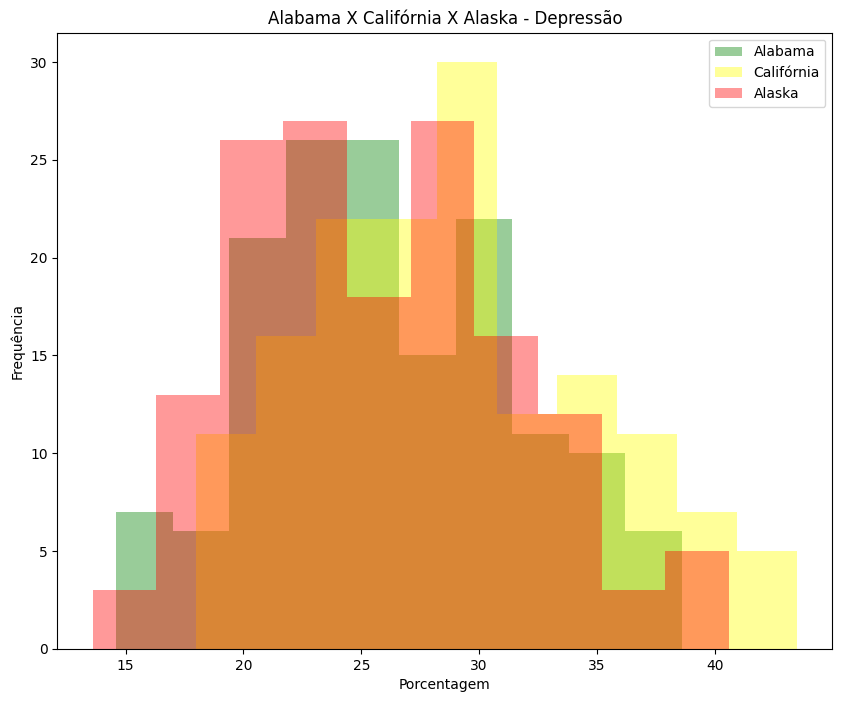

In [27]:
# Configuração do gráfico
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
plt.title('Alabama X Califórnia X Alaska - Depressão')
plt.xlabel('Porcentagem')
plt.ylabel('Frequência')

# Plotagem
# Alabama
plt.hist(dados_ala['CI baixo'], alpha=0.4, label='Alabama', color='green')
# Califórnia
plt.hist(dados_cali['CI baixo'], alpha=0.4, label='Califórnia', color='yellow')
# Alaska
plt.hist(dados_alk['CI baixo'], alpha=0.4, label='Alaska', color='#FF0000')

plt.legend()
plt.show()

##Criação do modelo de Classificação

O modelo a seguir será criado para identificar os sintomas de transtornos de ansiedade e depressão. Ou seja, com os dados de entrada, a saída será um sintoma, assim o psicólogo ou psiquiatra irá conseguir confirmar o diagnóstico.

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
#Primeiro lidando com dados ausentes
#Ver o shape antes
shape_antes = dados.shape
print("Antes:\t", shape_antes)

dados.dropna(subset=['Faixa de quartil'], inplace=True)
dados.dropna(subset=['Valor'], inplace=True)

#Ver o shape depois
shape_depois = dados.shape
print("Depois:\t", shape_depois)

Antes:	 (11484, 14)
Depois:	 (7650, 14)


In [30]:
# Escolhendo as colunas preditivas e alvo
x = dados.drop(columns = ['Diagnósticos', 'Grupo', 'Estado', 'Subgrupo', 'Etiqueta do período de tempo', 'Data de início do período', 'Data de término do período', 'Intervalo de confiança', 'Faixa de quartil'])
y = dados['Diagnósticos']   # Classe alvo

# Dividindo conjunto de treinamento e conjunto de teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [31]:
x_train.head(5)

,Fase,Período de tempo,Valor,CI baixo,CI alto
7124,3.1,33,25.8,21.4,30.5
2083,1.0,10,32.6,26.7,39.0
311,1.0,2,25.0,19.9,30.6
6229,3.1,29,30.8,25.5,36.5
7406,3.2,34,27.0,23.9,30.4


In [32]:
y_train.head(5)

7124    Symptoms of Anxiety Disorder or Depressive Dis...
2083    Symptoms of Anxiety Disorder or Depressive Dis...
311                          Symptoms of Anxiety Disorder
6229    Symptoms of Anxiety Disorder or Depressive Dis...
7406    Symptoms of Anxiety Disorder or Depressive Dis...
Name: Diagnósticos, dtype: object

In [33]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [34]:
lda = LinearDiscriminantAnalysis()  # Criando o objeto do classificador

lda.fit(x_train,y_train) # Treinando o classificador passando apenas o conjunto de dados de treinamento

LinearDiscriminantAnalysis()

In [35]:
# Passando apenas o x de teste
y_predicoes = lda.predict(x_test)

In [36]:
y_predicoes

array(['Symptoms of Depressive Disorder',
       'Symptoms of Depressive Disorder', 'Symptoms of Anxiety Disorder',
       ..., 'Symptoms of Anxiety Disorder or Depressive Disorder',
       'Symptoms of Anxiety Disorder', 'Symptoms of Anxiety Disorder'],
      dtype='<U51')

In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, classification_report

In [38]:
matriz_confusao = confusion_matrix(y_true = y_test,
                                   y_pred = y_predicoes,
                                   labels=['Symptoms of Depressive Disorder', 'Symptoms of Anxiety Disorder', 'Symptoms of Anxiety Disorder or Depressive Disorder'])

<Figure size 5000x500 with 0 Axes>

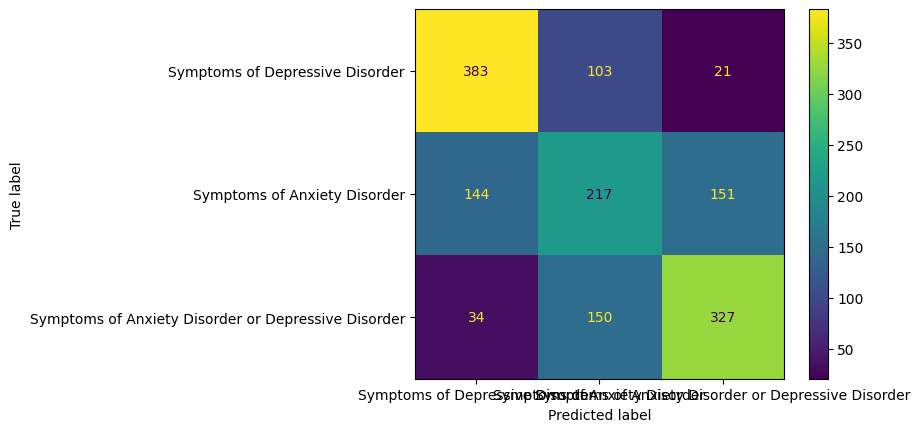

In [39]:
# plotando uma figura com a matriz de confusao
figure = plt.figure(figsize=(50, 5))
disp = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao, display_labels=['Symptoms of Depressive Disorder', 'Symptoms of Anxiety Disorder', 'Symptoms of Anxiety Disorder or Depressive Disorder'])
disp.plot(values_format='d')

In [40]:
accuracy_score(y_true = y_test, y_pred = y_predicoes,)

0.6058823529411764

In [41]:
precision_score(y_true=y_test, y_pred=y_predicoes, average='micro')

0.6058823529411764

In [42]:
precision_score(y_true=y_test, y_pred=y_predicoes, average='micro')

0.6058823529411764

In [43]:
precision_score(y_true=y_test, y_pred=y_predicoes, average='micro')

0.6058823529411764

In [44]:
# Metricas de precisão, revocação, f1-score e acurácia.
print(classification_report(y_test, y_predicoes))

                                                     precision    recall  f1-score   support

                       Symptoms of Anxiety Disorder       0.46      0.42      0.44       512
Symptoms of Anxiety Disorder or Depressive Disorder       0.66      0.64      0.65       511
                    Symptoms of Depressive Disorder       0.68      0.76      0.72       507

                                           accuracy                           0.61      1530
                                          macro avg       0.60      0.61      0.60      1530
                                       weighted avg       0.60      0.61      0.60      1530



In [45]:
import pickle

In [46]:
# Salvando em bytes (flag wb) para ser mais cross-platform (acessível a vários sistemas)
with open('meu_modelo_serializado_classificacao.pickle', 'wb') as f:
    pickle.dump(lda, f)

In [47]:
with open('meu_modelo_serializado_classificacao.pickle', 'rb') as f:
    modelo_carregado = pickle.load(f)

In [48]:
modelo_carregado.predict([[1,2,3,4,5]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


array(['Symptoms of Depressive Disorder'], dtype='<U51')

##Criação do modelo de Regressão

O modelo a seguir irá predizer o valor do diagnóstico.

Primeiro passo: carregando os dados

In [49]:
# Para trabalhar com dados em tabelas
import pandas as pd

# Para trabalhar com dados do OpenML
from sklearn.datasets import fetch_openml

# Para trabalhar com gráficos
import seaborn as sns
import matplotlib.pyplot as plt

In [50]:
dados.head()

,Diagnósticos,Grupo,Estado,Subgrupo,Fase,Período de tempo,Etiqueta do período de tempo,Data de início do período,Data de término do período,Valor,CI baixo,CI alto,Intervalo de confiança,Faixa de quartil
19,Symptoms of Depressive Disorder,By State,Alabama,Alabama,1.0,1,"Apr 23 - May 5, 2020",04/23/2020,2020-05-05 00:00:00,18.6,14.6,23.1,14.6 - 23.1,16.5 - 20.7
20,Symptoms of Depressive Disorder,By State,Alaska,Alaska,1.0,1,"Apr 23 - May 5, 2020",04/23/2020,2020-05-05 00:00:00,19.2,16.8,21.8,16.8 - 21.8,16.5 - 20.7
21,Symptoms of Depressive Disorder,By State,Arizona,Arizona,1.0,1,"Apr 23 - May 5, 2020",04/23/2020,2020-05-05 00:00:00,22.4,19.4,25.5,19.4 - 25.5,22.2 - 24.0
22,Symptoms of Depressive Disorder,By State,Arkansas,Arkansas,1.0,1,"Apr 23 - May 5, 2020",04/23/2020,2020-05-05 00:00:00,26.6,22.3,31.3,22.3 - 31.3,24.1 - 28.7
23,Symptoms of Depressive Disorder,By State,California,California,1.0,1,"Apr 23 - May 5, 2020",04/23/2020,2020-05-05 00:00:00,25.4,22.5,28.6,22.5 - 28.6,24.1 - 28.7


In [51]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7650 entries, 19 to 11483
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Diagnósticos                  7650 non-null   object 
 1   Grupo                         7650 non-null   object 
 2   Estado                        7650 non-null   object 
 3   Subgrupo                      7650 non-null   object 
 4   Fase                          7650 non-null   float64
 5   Período de tempo              7650 non-null   int64  
 6   Etiqueta do período de tempo  7650 non-null   object 
 7   Data de início do período     7650 non-null   object 
 8   Data de término do período    7650 non-null   object 
 9   Valor                         7650 non-null   float64
 10  CI baixo                      7650 non-null   float64
 11  CI alto                       7650 non-null   float64
 12  Intervalo de confiança        7650 non-null   object 
 13  F

<ipython-input-52-3c0e1fc7d43a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dados.corr())


<Axes: >

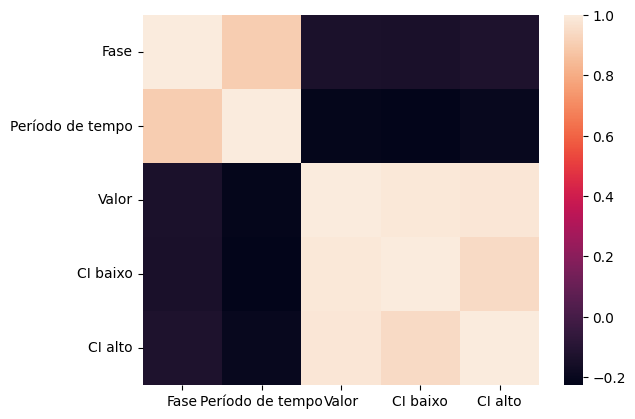

In [52]:
sns.heatmap(dados.corr())

Segundo passo: separando os dados

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
len(dados)

7650

In [55]:
# Escolhendo as colunas preditivas e alvo
x = dados.drop(columns = ['Diagnósticos', 'Grupo', 'Estado', 'Subgrupo', 'Etiqueta do período de tempo', 'Data de início do período', 'Data de término do período', 'Intervalo de confiança', 'Faixa de quartil'])
y = dados['Valor']   # Classe alvo

# Dividindo conjunto de treinamento e conjunto de teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [56]:
len(x_train), len(x_test), len(y_train), len(y_test)

(6120, 1530, 6120, 1530)

Terceiro passo: treinando o algoritmo



In [57]:
from sklearn.linear_model import LinearRegression

In [58]:
lr = LinearRegression()  # Criando o objeto do regressor

lr.fit(x_train,y_train) # Treinando o regressor passando apenas o conjunto de dados de treinamento

LinearRegression()

Quinto passo: testar e avaliar

In [59]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import pearsonr

In [60]:
# Passando apenas o x de teste
y_predicoes = lr.predict(x_test)

In [61]:
MAE = mean_absolute_error(y_true = y_test,      # Gabarito
                          y_pred = y_predicoes) # Respostas do algoritmo ao teste realizado
print('MAE: ', MAE)

MAE:  1.7763568394002505e-15


In [62]:
MSE = mean_squared_error(y_true = y_test,      # Gabarito
                         y_pred = y_predicoes) # Respostas do algoritmo ao teste realizado
print('MSE: ', MSE)
print('raiz MSE: ', MSE**0.5)

MSE:  1.090174835293665e-29
raiz MSE:  3.30177957364459e-15


In [63]:
R2 = r2_score(y_true = y_test,      # Gabarito
              y_pred = y_predicoes) # Respostas do algoritmo ao teste realizado
print('R2: ', R2)

R2:  1.0


In [64]:
rho = pearsonr(y_test, y_predicoes)
print('\u03C1:', rho[0])

ρ: 1.0


Modelo obtido:

In [65]:
a_modelo = lr.coef_      # Coeficientes angulares do modelo
b_modelo = lr.intercept_ # Coeficiente linear do model

In [66]:
print(a_modelo, b_modelo)

[-2.49241698e-15  9.71445147e-17  1.00000000e+00 -1.04083409e-17
 -2.05131051e-16] 1.4210854715202004e-14


In [67]:
R2_treinamento = lr.score(x_train, y_train)
print(R2_treinamento)

1.0


In [68]:
y_pred_linear = y_predicoes # Salvando as informações do Modelo Reg Linear para comparar depois

Voltando e trocando o algoritmo para uma Rede Neural Perceptron Multicamada:

In [69]:
# Importando o Escalonador de Normalização
from sklearn.preprocessing import StandardScaler

In [70]:
#Escalonamento
scaler = StandardScaler() # Criando o objeto de escalonamento
scaler.fit(x_train) # Passando os dados de treinamento para encontrar a escala

x_train_escalonado = scaler.transform(x_train)
x_test_escalonado = scaler.transform(x_test)

Criando a rede neural e treinando ela:

In [71]:
# Importando a Rede Neural MLP para Regressão
from sklearn.neural_network import MLPRegressor

In [72]:
#Treino
# Instanciando o objeto
ml_perceptron = MLPRegressor(solver='lbfgs', # otimizador por métodos quasi-Newton
                             tol=1e-5, # Limiar para a otimização (treinamento)
                             max_iter=1500, # Limite de iterações durante a otimização (treinamento)
                             random_state=42,
                             hidden_layer_sizes=(10,4), # Quantidade de neuronios por camada oculta
                             activation='relu') # Função de ativação dos neuronios

ml_perceptron.fit(x_train_escalonado, y_train)  # Treinando

MLPRegressor(hidden_layer_sizes=(10, 4), max_iter=1500, random_state=42,
             solver='lbfgs', tol=1e-05)

In [73]:
#Teste
y_predicoes = ml_perceptron.predict(x_test_escalonado) # Passando o x_test escalonado

R2 = r2_score(y_true = y_test,      # Gabarito
              y_pred = y_predicoes) # Respostas do algoritmo ao teste realizado
print('R2: ', R2)

rho = pearsonr(y_test, y_predicoes)
print('\u03C1:', rho[0])

MAE = mean_absolute_error(y_true = y_test,      # Gabarito
                          y_pred = y_predicoes) # Respostas do algoritmo ao teste realizado
print('MAE: ', MAE)

MSE = mean_squared_error(y_true = y_test,      # Gabarito
                         y_pred = y_predicoes) # Respostas do algoritmo ao teste realizado
print('MSE: ', MSE)

R2:  0.9999395491671131
ρ: 0.9999700437328979
MAE:  0.0042747180445089055
MSE:  0.002614095368060832


In [74]:
y_predicoes_mlp = y_predicoes

Gráfico de acerto:

In [75]:
import seaborn as sns

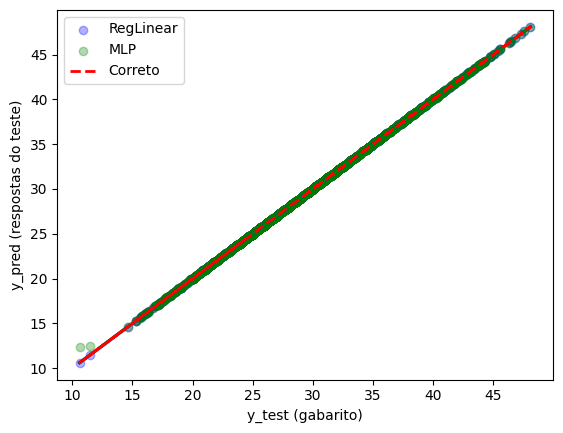

In [76]:
ax = sns.regplot(x=y_test,y=y_pred_linear,
                 color="b", scatter_kws={'alpha':0.3}, label='RegLinear') # Regressão Linear
ax = sns.regplot(x=y_test,y=y_predicoes_mlp,
                 color="g", scatter_kws={'alpha':0.3}, label='MLP') # Rede Neural
ax.plot(y_test, y_test, 'r--', linewidth = 2, label='Correto') # Reta 100% correto
ax.set(xlabel='y_test (gabarito)', ylabel='y_pred (respostas do teste)')
ax.legend()

Salvando o modelo treinado:

In [77]:
import pickle

In [78]:
# Salvando em bytes (flag wb) para ser mais cross-platform (acessível a vários sistemas)
with open('meu_modelo_serializado_regressao.pickle', 'wb') as f:
    pickle.dump(ml_perceptron, f)

In [79]:
with open('meu_modelo_serializado_regressao.pickle', 'rb') as f:
    modelo_carregado2 = pickle.load(f)

In [80]:
modelo_carregado2.predict([[1,2,3,4,5]])

array([48.57302273])